## Serie de tiempo Motor a Gasolina GX160H2 QBT

Maribel Medina Arboleda \
Manuel Alberto Peñafiel Mendoza \
Carlos Alberto Lenguerque Moreno \

El conjunto de datos con el que se desarrolló el proyecto es una base de datos otorgada por la empresa Energía y Potencia SAS, empresa comercializadora de productos para el agro a nivel nacional

Histórico de ventas de cada producto desde el año 2014
Variable respuesta: Ventas en unidades
Variables explicativas: Año y mes de ventas, Producto, Stock 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.dates as mdates
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('fast')

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

from scipy.stats import boxcox 

from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

from datetime import datetime, timedelta
from pandas.tseries.offsets import MonthEnd

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Estadistica Multivariada/Proyecto/GX160H2-QTB.csv')
data.head().append(data.tail())


,Meses,Ventas
0,2014-1,110
1,2014-2,88
2,2014-3,31
3,2014-4,82
4,2014-5,59
88,2021-5,3
89,2021-6,34
90,2021-7,40
91,2021-8,12
92,2021-9,36


In [5]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
# --- Donde parse_dates indica qué columna de los datos se selecciona como información de fecha y hora,
# --- index_col le dice a los pandas qué columna usar como índice
# --- date_parser usa una función (este artículo usa una expresión lambda en su lugar) para convertir una cadena en una variable de fecha y hora

data = pd.read_csv('/content/drive/MyDrive/Estadistica Multivariada/Proyecto/GX160H2-QTB.csv', parse_dates=['Meses'], index_col='Meses',date_parser=dateparse)
data.head()
data.index

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
      

In [6]:
## Observemos la fecha mínima y la fecha máxima

print(data.index.min())
print(data.index.max())

2014-01-01 00:00:00
2021-09-01 00:00:00


## Veamos cuántos datos tenemos en cada año

In [7]:
print(len(data['2014']))
print(len(data['2015']))
print(len(data['2016']))
print(len(data['2017']))
print(len(data['2018']))
print(len(data['2019']))
print(len(data['2020']))
print(len(data['2021']))

12
12
12
12
12
12
12
9


## Visualización de datos

In [8]:
data.describe()

,Ventas
count,93.000000
mean,45.032258
std,34.443543
min,1.000000
25%,21.000000
50%,36.000000
75%,57.000000
max,183.000000


Esta es una referencia muy nerviosa, es decir, vemos que las ventas estarán entre 144 y 570 unidades, asimismo, la mínima cantidad de venta es 5 y la máxima 1294

In [9]:
años =data.resample('Y').mean()
años

,Ventas
Meses,
2014-12-31,66.166667
2015-12-31,63.916667
2016-12-31,62.583333
2017-12-31,37.666667
2018-12-31,35.083333
2019-12-31,37.250000
2020-12-31,29.666667
2021-12-31,22.222222


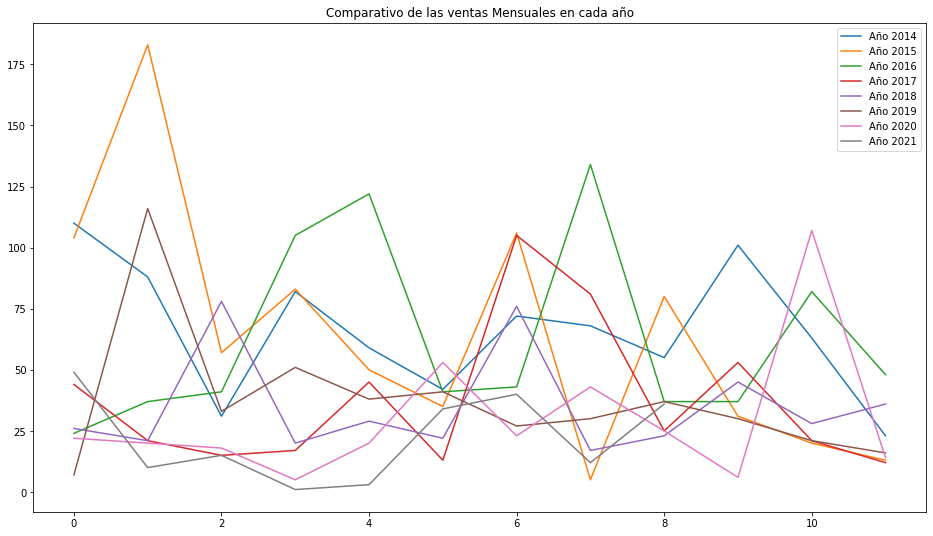

In [10]:
plt.plot(data['2014'].values, label='Año 2014')
plt.plot(data['2015'].values, label='Año 2015')
plt.plot(data['2016'].values, label='Año 2016')
plt.plot(data['2017'].values, label='Año 2017')
plt.plot(data['2018'].values, label='Año 2018')
plt.plot(data['2019'].values, label='Año 2019')
plt.plot(data['2020'].values, label='Año 2020')
plt.plot(data['2021'].values, label='Año 2021')
plt.legend(loc = 'best')
plt.title('Comparativo de las ventas Mensuales en cada año')
plt.show(block=False)

No se observa una estacionalidad en el comportamiento de las ventas

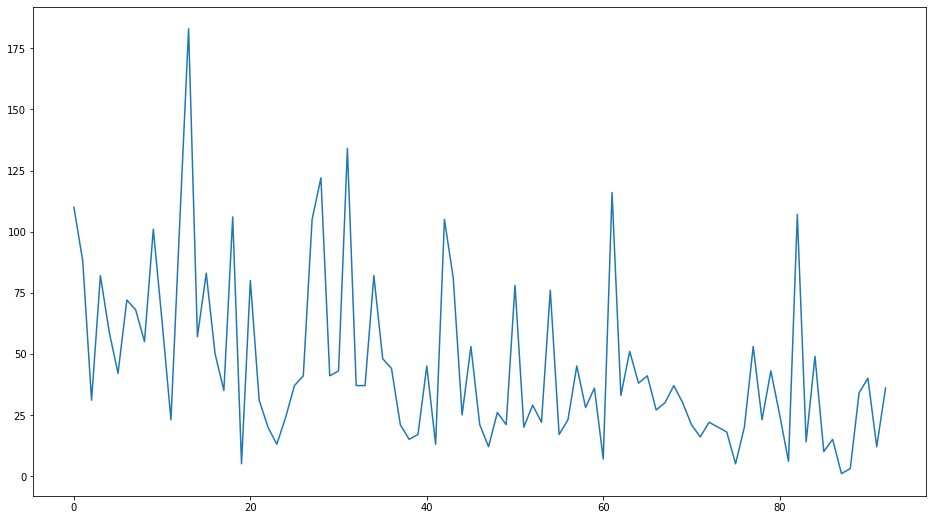

In [11]:
plt.plot(data.values)


In [12]:
# Aplicando el filtro Hodrick-Prescott para separar en tendencia y 
# componente ciclico.
prd_ciclo, prd_tend = sm.tsa.filters.hpfilter(data['Ventas'])
data['Tendencia'] = prd_tend

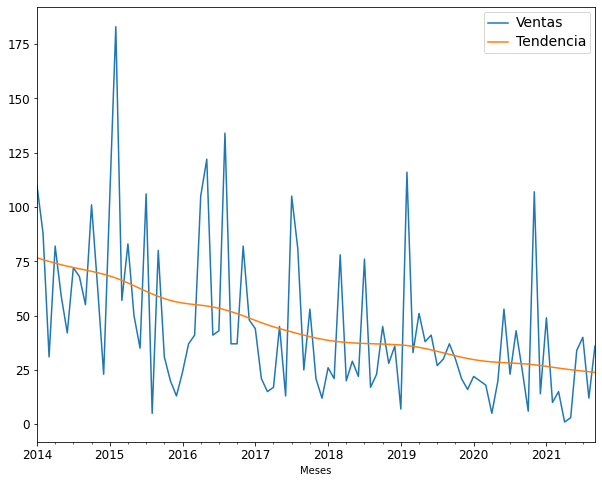

In [13]:
# graficando la variacion de la venta real con la tendencia.
data[['Ventas', 'Tendencia']].plot(figsize=(10, 8), fontsize=12);
legend = plt.legend()
legend.prop.set_size(14);

## Análisis de datos atípicos

{'boxes': [<matplotlib.lines.Line2D at 0x7f745d8993d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f745d89f410>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f745d8a8450>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f745d89fed0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f745d899950>,
  <matplotlib.lines.Line2D at 0x7f745d899e90>]}

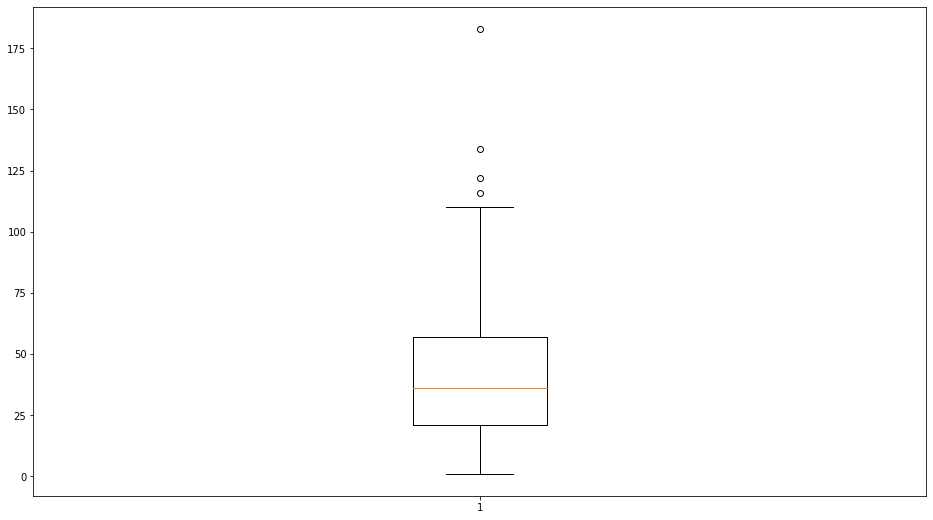

In [14]:
plt.boxplot(data['Ventas'])

Estos datos atípicos se debe a ventas que se desarrollan a partir de meses donde hay poco stock de la referencia

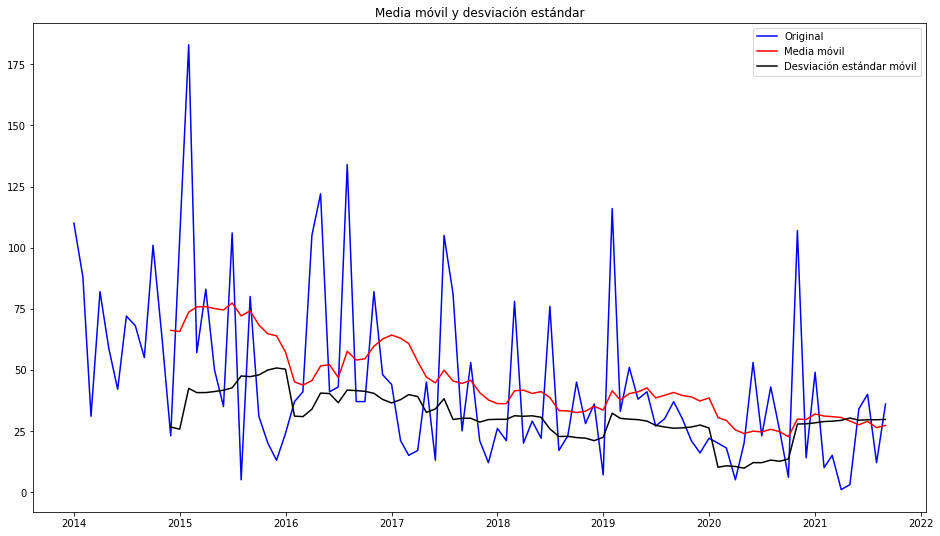

Resultados Test Dickey-Fuller:
Test Statistic                 -3.539690
p-value                         0.007024
#Lags Used                      2.000000
Number of Observations Used    90.000000
Critical value (1%)            -3.505190
dtype: float64
Test Statistic                 -3.539690
p-value                         0.007024
#Lags Used                      2.000000
Number of Observations Used    90.000000
Critical value (1%)            -3.505190
Critical value (5%)            -2.894232
dtype: float64
Test Statistic                 -3.539690
p-value                         0.007024
#Lags Used                      2.000000
Number of Observations Used    90.000000
Critical value (1%)            -3.505190
Critical value (5%)            -2.894232
Critical value (10%)           -2.584210
dtype: float64


In [15]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
   # Aquí se usa un año como ventana, y el valor de cada vez t se reemplaza por el valor medio de los 12 meses anteriores (incluido él mismo), y la desviación estándar es la misma.
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()    
    #plot rolling statistics:
    fig = plt.figure()
    fig.add_subplot()
    orig = plt.plot(timeseries, color = 'blue',label='Original')
    mean = plt.plot(rolmean , color = 'red',label = 'Media móvil')
    std = plt.plot(rolstd, color = 'black', label= 'Desviación estándar móvil')
    
    plt.legend(loc = 'best')
    plt.title('Media móvil y desviación estándar')
    plt.show(block=False)    
    
    #Dickey-Fuller test:
    
    ##El elemento anterior de la salida de dftest es el valor de detección, el valor p, el número de retardo, el número de observaciones utilizadas y el valor crítico en cada nivel de confianza.
    print('Resultados Test Dickey-Fuller:')
    Dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(Dftest[0:4],index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])    
    
    for key,value in Dftest[4].items():
        dfoutput['Critical value (%s)' %key] = value    
        print(dfoutput)
    
ts = data['Ventas']
test_stationarity(ts)

# Prueba de Dickey-Fuller:
Las pruebas estadísticas hacen fuertes suposiciones sobre los datos. Sólo pueden utilizarse para informar del grado en que se puede rechazar o no una hipótesis nula. El resultado debe interpretarse para que un problema determinado tenga sentido.

La prueba Dickey-Fuller aumentada es un tipo de prueba estadística denominada prueba de raíz unitaria.

La intuición que subyace a una prueba de raíz unitaria es que determina la intensidad con la que una serie temporal está definida por una tendencia.

Hay varias pruebas de raíz unitaria y la de Dickey-Fuller aumentada puede ser una de las más utilizadas. Utiliza un modelo autorregresivo y optimiza un criterio de información a través de múltiples valores de retardo diferentes.

La hipótesis nula de la prueba es que la serie temporal puede ser representada por una raíz unitaria, que no es estacionaria (tiene alguna estructura dependiente del tiempo). La hipótesis alternativa (que rechaza la hipótesis nula) es que la serie temporal es estacionaria.

Hipótesis nula (H0): Si no se rechaza, sugiere que la serie temporal tiene una raíz unitaria, lo que significa que no es estacionaria. Tiene una estructura dependiente del tiempo.
Hipótesis alternativa (H1): Si se rechaza la hipótesis nula, sugiere que la serie temporal no tiene una raíz unitaria, lo que significa que es estacionaria. No tiene una estructura dependiente del tiempo.

Interpretamos este resultado utilizando el valor p de la prueba. Un valor p por debajo de un umbral (como el 5% o el 1%) sugiere que se rechaza la hipótesis nula (estacionalidad); de lo contrario, un valor p por encima del umbral sugiere que no se rechaza la hipótesis nula (no estacionalidad).

**Valor p > 0,05**: No se rechaza la hipótesis nula (H0), los datos tienen una raíz unitaria y son no estacionarios.\
**Valor p <= 0,05**: Rechaza la hipótesis nula (H0), los datos no tienen una raíz unitaria y son estacionarios.

## Descomposición de una serie temporal
La descomposición de series de tiempo es una técnica que divide una serie de tiempo en varios componentes, cada uno de los cuales representa una categoría de patrón subyacente, tendencia, estacionalidad y ruido

**Estacionalidad** : describe la señal periódica en su serie temporal.\
**Tendencia** : describe si la serie de tiempo disminuye, es constante o aumenta con el tiempo.\
**Ruido** : describe lo que queda detrás de la separación de estacionalidad y tendencia de la serie temporal. En otras palabras, es la variabilidad de los datos lo que el modelo no puede explicar.


In [16]:
result=seasonal_decompose(data['Ventas'], model='additive')

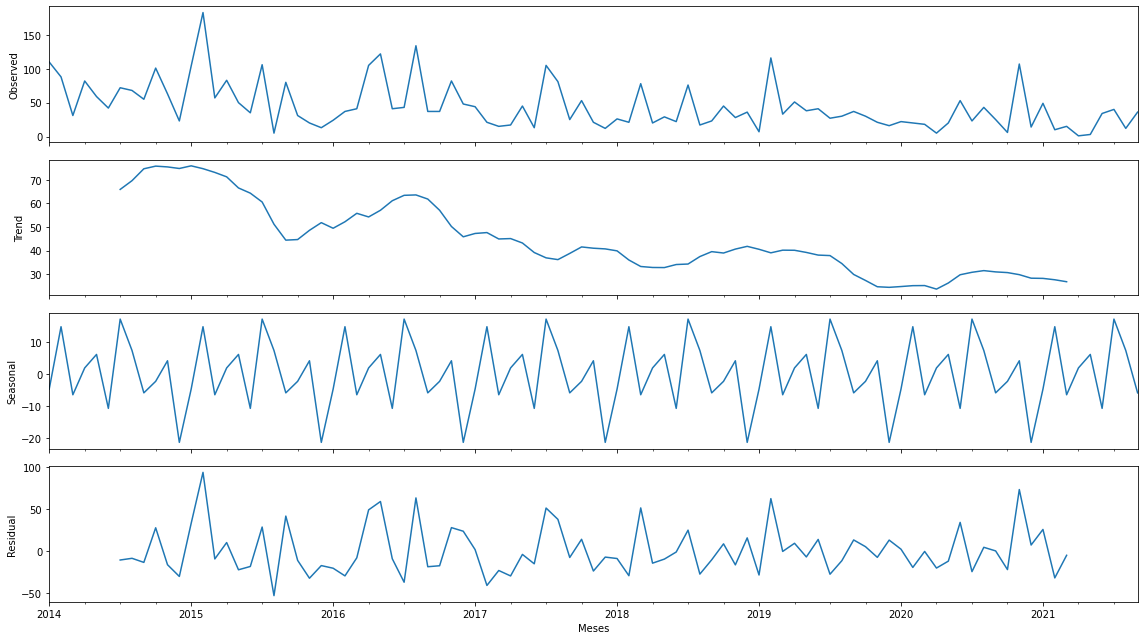

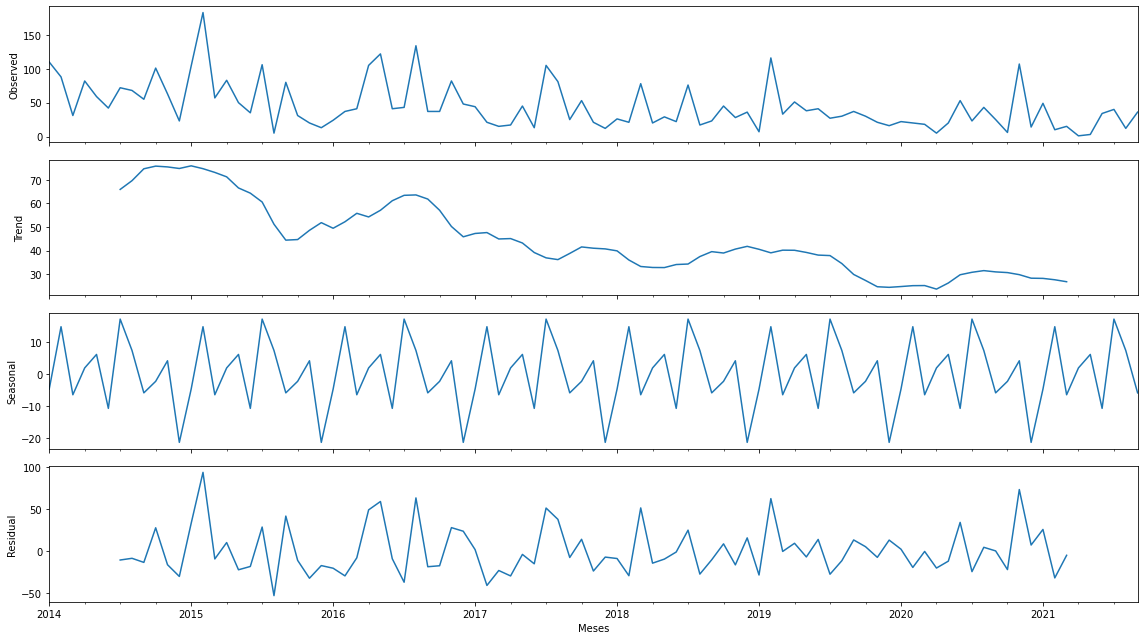

In [17]:
result.plot()

Normalización de los datos, para centralizarlos y generalizar el problema a realizar, es una práctica necesaria a nivel estadístico para garantizar que se están analizando los conjuntos de datos en un rango que permita a los modelos ser mucho más específicos y precisos

In [18]:
data = (data - data.min())/(data.max() - data.min())
print(data)


              Ventas  Tendencia
Meses                          
2014-01-01  0.598901   1.000000
2014-02-01  0.478022   0.983939
2014-03-01  0.164835   0.968275
2014-04-01  0.445055   0.953547
2014-05-01  0.318681   0.939776
...              ...        ...
2021-05-01  0.010989   0.023052
2021-06-01  0.181319   0.016936
2021-07-01  0.214286   0.011147
2021-08-01  0.060440   0.005502
2021-09-01  0.192308   0.000000

[93 rows x 2 columns]


#Pronóstico ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


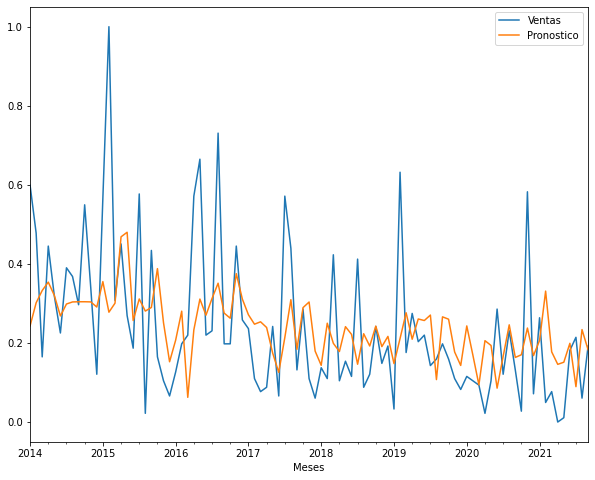

In [19]:
# Modelo ARIMA sobre las ventas.
# autoregressive models: AR(p)
# moving average models: MA(q)
# mixed autoregressive moving average models: ARMA(p, q)
# integration models: ARIMA(p, d, q)
# seasonal models: SARIMA(P, D, Q, s)
# regression with errors that follow one of the above ARIMA-type models

modelo = sm.tsa.ARIMA(data['Ventas'], order=(12,0,3)) #12,0,1  
resultados = modelo.fit()  
data['Pronostico'] = resultados.fittedvalues  
plot = data[['Ventas', 'Pronostico']].plot(figsize=(10, 8))

In [20]:
print(resultados.summary())

                              ARMA Model Results                              
Dep. Variable:                 Ventas   No. Observations:                   93
Model:                    ARMA(12, 3)   Log Likelihood                  32.207
Method:                       css-mle   S.D. of innovations              0.167
Date:                Sun, 05 Dec 2021   AIC                            -30.413
Time:                        19:53:26   BIC                             12.641
Sample:                    01-01-2014   HQIC                           -13.029
                         - 09-01-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2433      0.033      7.289      0.000       0.178       0.309
ar.L1.Ventas      0.3967      0.133      2.989      0.004       0.137       0.657
ar.L2.Ventas     -0.1292      0.148     

In [21]:
# Error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data['Ventas'],
                y_pred = data['Pronostico']
            )
print(f"Error de test (mse): {error_mse}")

Error de test (mse): 0.029660085824937926


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


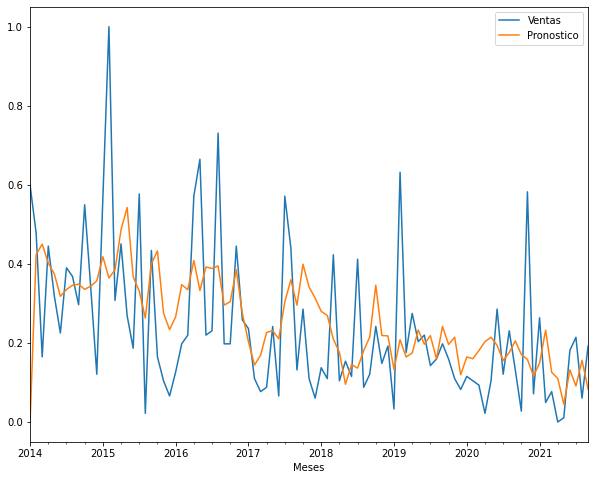

In [24]:
# Modelo ARIMA sobre las ventas.
modelo = sm.tsa.SARIMAX(data['Ventas'],  order=(12,0,3), seasonal_order=(0,0,0,12))
resultados = modelo.fit()  
data['Pronostico'] = resultados.fittedvalues  
plot = data[['Ventas', 'Pronostico']].plot(figsize=(10, 8))

In [25]:
# Error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data['Ventas'],
                y_pred = data['Pronostico']
            )
print(f"Error de test (mse): {error_mse}")

Error de test (mse): 0.03050150184239812


**#Seasonal ARIMA with Cross-Validation**





In [29]:
# SARIMA model with cross-validation
def SARIMA_CV(df, target, order, seasonal_order):
    
    y = df[target]
    errors = []
    for month in [7, 8, 9]:
        start = datetime(2021, month,1)
        end = start + MonthEnd(1)

        # split data
        y_tr = y.loc[:start-timedelta(1)]
        y_val = y.loc[start:end]
                
        # train Seasonal ARIMA Model
        model = sm.tsa.SARIMAX(y_tr, order=order, seasonal_order=seasonal_order)
        fit = model.fit()

        # forecast
        y_pred = fit.forecast(len(y_val))

        # error
        err = RMSLE(y_val, y_pred)
        errors.append(err)

        print(f'\n Validation on Month {month}:')
        print(f'\t Number of Train Data: {len(y_tr)}')
        print(f'\t Number of Validation Data: {len(y_val)}')
        print(f'\t RMSLE: {err}')

        fig, ax = plt.subplots(figsize=(30,3))
        months = mdates.MonthLocator()
        for name, dat, c in zip(['Entrenamiento', 'Validación', 'Predicción'], [y_tr, y_val, y_pred], ['b', 'g', 'r']):
            ax.plot(dat, c=c, label=name)
        ax.xaxis.set_major_locator(months)
        plt.legend()
        plt.grid()
        plt.show()
    
    print(f'\n Mean RMSLE: {np.mean(errors)}')
    print(f' Std RMSLE: {np.std(errors)}')

    
    
# root mean square logarithmic error
def RMSLE(y_true, y_pred):
    MSLE = mean_squared_log_error(y_true, y_pred)
    return np.sqrt(MSLE)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



 Validation on Month 7:
	 Number of Train Data: 90
	 Number of Validation Data: 1
	 RMSLE: 0.04922061871981287


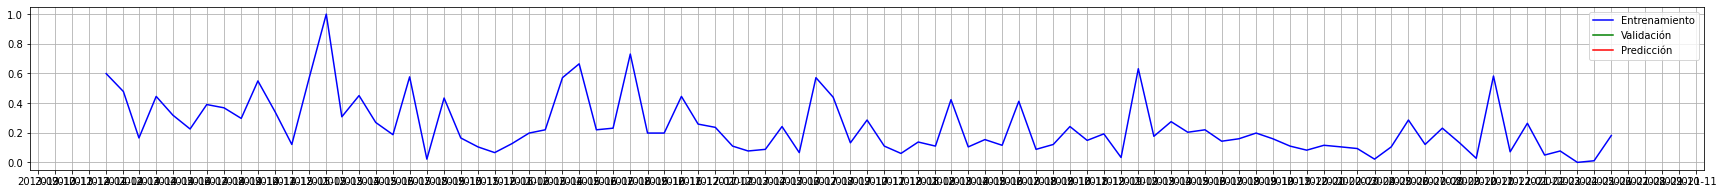

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



 Validation on Month 8:
	 Number of Train Data: 91
	 Number of Validation Data: 1
	 RMSLE: 0.03573174388603426


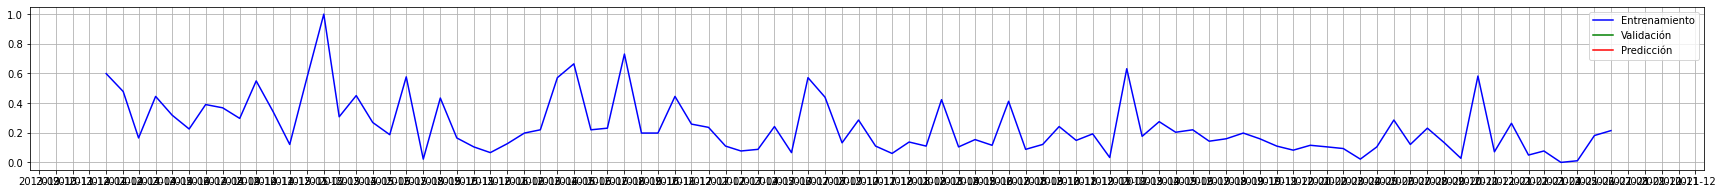

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



 Validation on Month 9:
	 Number of Train Data: 92
	 Number of Validation Data: 1
	 RMSLE: 0.13790761429620702


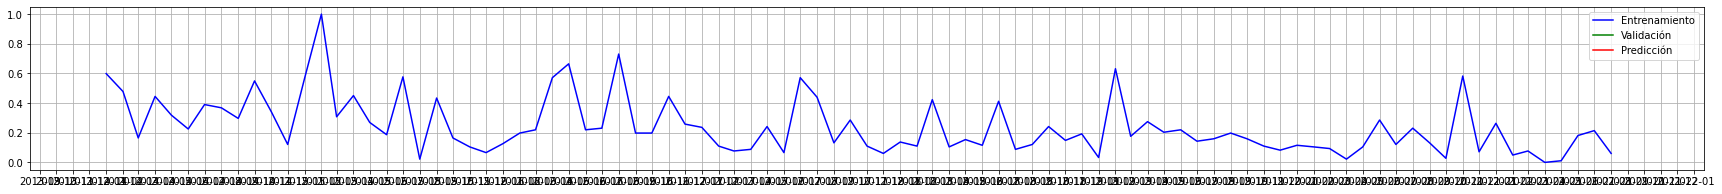


 Mean RMSLE: 0.07428665896735138
 Std RMSLE: 0.04532259851176173


In [31]:
SARIMA_CV(data, target='Ventas', order=(1,1,2), seasonal_order=(2,1,0,12))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



 Validation on Month 7:
	 Number of Train Data: 90
	 Number of Validation Data: 1
	 RMSLE: 0.10962328634900169


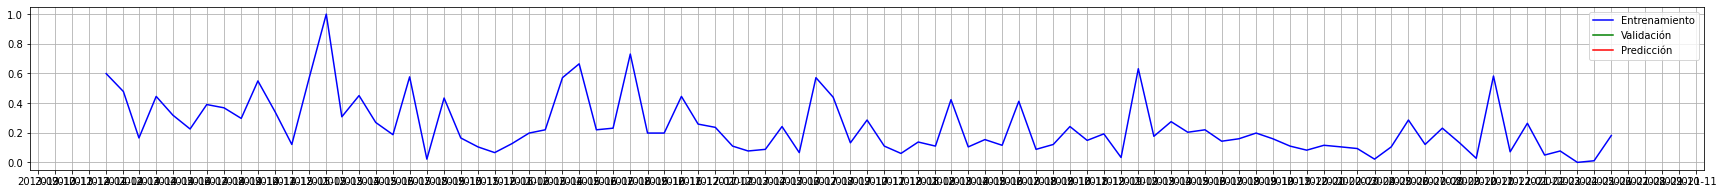

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



 Validation on Month 8:
	 Number of Train Data: 91
	 Number of Validation Data: 1
	 RMSLE: 0.12337217725654603


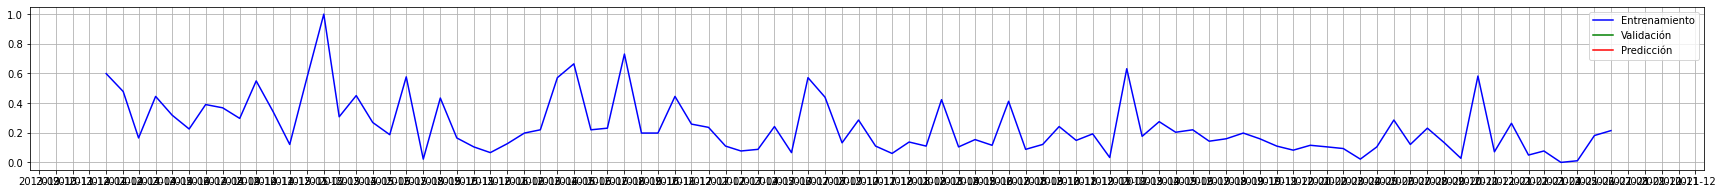

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



 Validation on Month 9:
	 Number of Train Data: 92
	 Number of Validation Data: 1
	 RMSLE: 0.08144366568013092


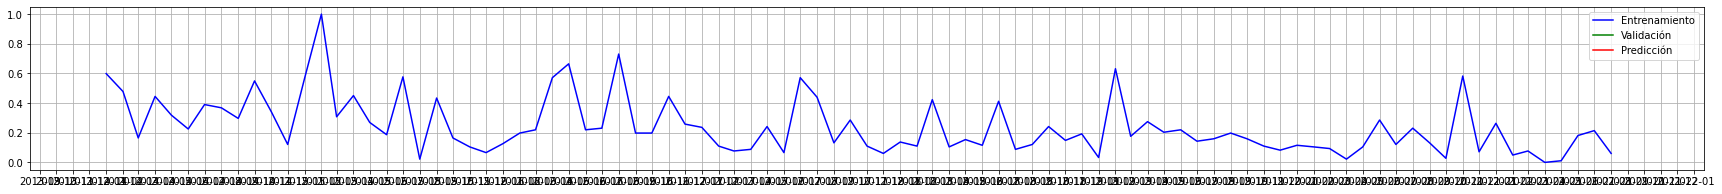


 Mean RMSLE: 0.10481304309522621
 Std RMSLE: 0.01745191204183204


In [32]:
SARIMA_CV(data, target='Ventas', order=(0,1,1), seasonal_order=(0,1,0,12))